<a href="https://colab.research.google.com/github/sheldonkemper/portfolio/blob/main/CAM_DS_C301_W6_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 6.5 Preparing for time series analysis in Python

## Scenario
The Baltimore Police Department (BPD), situated in Baltimore, USA, created a data set containing crime records from 1 January 2011 to 18 June 2016. Although the data set is considered preliminary and subject to change, it contains 264,496 rows and 11 columns (BPD, 2024).

For this activity, the data set was adapted to indicate the number of daily crime incidents from 1 January 2011 to 31 December 2015. Therefore, the data set contains 2,143 rows and 2 columns. You are tasked to analyse the provided data set to determine visible crime trends. You must also provide a clear and precise rationale for your analysis and findings.


## Objective
In this portfolio activity, you will analyse a time series data set to gain insights into crime trends.

You will complete the activity in your Notebook, where you will:
- preprocess the data
- visualise the data
- calculate and compare ACF and PACF
- transform and decompose the data
- perform statistical analysis
- present your insights based on statistical tests and visualisations.


## Assessment criteria
By completing this activity, you will be able to provide evidence that you can:
- Synthesise autocorrelation and stationarity concepts and define their importance in time series analysis.
- Recognise white noise, identify random walk behaviour processes in time series, and apply statistical tests for model diagnostics.
- Accurately perform time series decomposition, including seasonality, trend, and residual components, and apply transformations to make time series stationary.
- Critically evaluate the effectiveness of time series analysis to address real-world problems.



## Activity guidance
1. Import the relevant libraries for data analysis and visualisation.
2. Explore and preprocess the data set.
3. Preprocess the data, handling missing values and encoding categorical variables as needed.
4. Handle missing values and compare results.
5. Create a new DataFrame with weekly-grouped daily-average and visualise the data.
6.  Calculate the ACF and PACF with 1% insignificance region around zero of monthly data. Thereafter, interpret the output.
7. Determine if data should be transformed.
8. Decompose the data and determine the STL residuals. Store the residuals as `stl_object.resid`.
9. Apply Ljung-Box and ADF tests on the data.
10. Provide a clear and precise rationale for your data analysis and interpretation.

In [247]:
# Import required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import boxcox
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller



functions

In [248]:
from datetime import datetime
# Function to format dates
def format_dates(date_list):
    formatted_dates = []
    for date in date_list:
        if len(date.split('-')[2]) == 2:  # If year is two digits
            formatted_date = datetime.strptime(date, '%m-%d-%y').strftime('%Y-%m-%d')
        else:  # If year is four digits
            formatted_date = datetime.strptime(date, '%m-%d-%Y').strftime('%Y-%m-%d')
        formatted_dates.append(formatted_date)
    return formatted_dates

In [249]:
# Import data set from GitHub repository:
# url = 'https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/crime_incidents.csv'
data = pd.read_csv('https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/crime_incidents.csv') #
data.head()

,date,incidents
0,01-01-11,185.0
1,01-01-12,176.0
2,01-01-13,157.0
3,01-01-14,139.0
4,01-01-15,157.0


# **Step 1: Convert date to datetime format and set it as the index**

In [250]:
# Get all distinct dates in the dataset
distinct_dates = data['date'].unique()

# dates sorted in ascending order
sorted_dates = sorted(distinct_dates)
sorted_dates.head(100)


['01-01-11' '01-01-12' '01-01-13' ... '12/31/2013' '12/31/2014'
 '12/31/2015']
['01-01-11', '01-01-12', '01-01-13', '01-01-14', '01-01-15', '01-01-16', '01-02-11', '01-02-12', '01-02-13', '01-02-14', '01-02-15', '01-02-16', '01-03-11', '01-03-12', '01-03-13', '01-03-14', '01-03-15', '01-03-16', '01-04-11', '01-04-12', '01-04-13', '01-04-14', '01-04-15', '01-04-16', '01-05-11', '01-05-12', '01-05-13', '01-05-14', '01-05-15', '01-05-16', '01-06-11', '01-06-12', '01-06-13', '01-06-14', '01-06-15', '01-06-16', '01-07-11', '01-07-12', '01-07-13', '01-07-14', '01-07-15', '01-07-16', '01-08-11', '01-08-12', '01-08-13', '01-08-14', '01-08-15', '01-08-16', '01-09-11', '01-09-12', '01-09-13', '01-09-14', '01-09-15', '01-09-16', '01-10-11', '01-10-12', '01-10-13', '01-10-14', '01-10-15', '01-10-16', '01-11-11', '01-11-12', '01-11-13', '01-11-14', '01-11-15', '01-11-16', '01-12-11', '01-12-12', '01-12-13', '01-12-14', '01-12-15', '01-12-16', '01/13/2011', '01/13/2012', '01/13/2013', '01/13/2014', 

## **Step 1.1: Format date**

In [251]:
data['date'] = data['date'].str.replace(r'[-/]', '-', regex=True)
# Format the 'date' field using the custom `format_dates` function
data['date'] = format_dates(data['date'])
print(data.index.is_monotonic_increasing)

True


# **Step 2: Visualise the data**




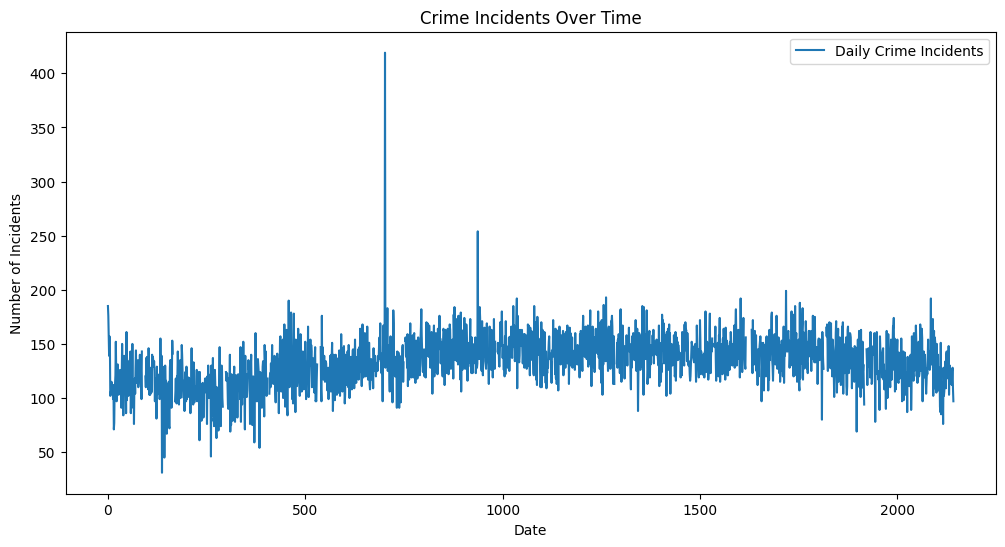

In [252]:
# Plot the data to observe trends and seasonality
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['incidents'], label='Daily Crime Incidents')
plt.title('Crime Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()


# **Step 3: Check for missing or irregular values**

In [253]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Display basic statistics
print(data.describe())


Missing values:
 date          0
incidents    74
dtype: int64
         incidents
count  2069.000000
mean    133.571290
std      22.940221
min      31.000000
25%     120.000000
50%     134.000000
75%     148.000000
max     419.000000


## **Step 3.1 Dropping the 74 rows with missing values**

In [254]:
nan_rows = data[data['incidents'].isna()]
print(nan_rows)

            date  incidents
87    2014-01-15        NaN
88    2015-01-15        NaN
89    2016-01-15        NaN
90    2011-01-16        NaN
91    2012-01-16        NaN
...          ...        ...
1917  2015-11-16        NaN
1918  2011-11-17        NaN
1919  2012-11-17        NaN
1920  2013-11-17        NaN
1921  2014-11-17        NaN

[74 rows x 2 columns]


In [255]:
# Drop rows with missing values in the 'incidents' column
data.dropna(subset=['incidents'], inplace=True)
pd.to_datetime(data['date'])

# Verify there are no missing values left
print(data.isnull().sum())

# Check the updated shape of the dataset
print(f"Updated dataset shape: {data.shape}")

print(data.index.is_monotonic_increasing)
print(data.index.hasnans)


date         0
incidents    0
dtype: int64
Updated dataset shape: (2069, 2)
True
False


In [256]:
# Convert 'date' column to datetime and set it as the index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Now you can check the frequency
print(data.index.freq)
print(data.index.inferred_freq)

data = data.asfreq('D')

None
None


In [257]:
# Reset the index
data.reset_index(inplace=True)

# Ensure 'date' is a proper datetime object
data['date'] = pd.to_datetime(data['date'])

# Set 'date' as index again
data.set_index('date', inplace=True)

# **Step 4: Creating a new DataFrame with weekly-grouped daily averages and visualising the data.**

<Week: weekday=6>


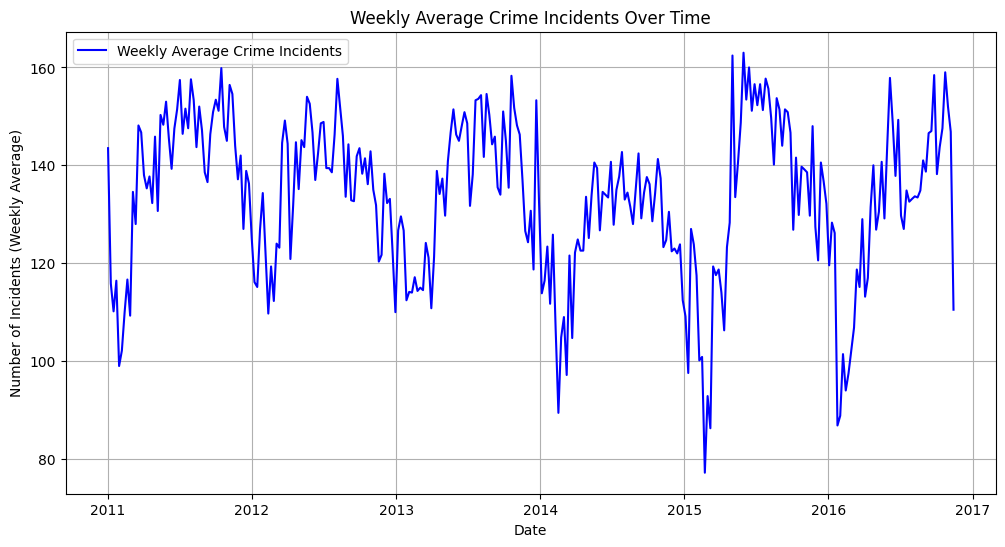

In [258]:
# Group by week and calculate the weekly average
weekly_data = data.resample('W').mean()
# Check the frequency of the index to confirm it's weekly
print(weekly_data.index.freq)

# Plot the weekly averages to observe trends and seasonality
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['incidents'], label='Weekly Average Crime Incidents', color='blue')
plt.title('Weekly Average Crime Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents (Weekly Average)')
plt.legend()
plt.grid(True)
plt.show()



# **Step 5: Calculate ACF and PACF**

Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) are crucial tools to understand the time series data's structure. ACF helps identify seasonality, while PACF highlights lags with direct relationships to the current observation.

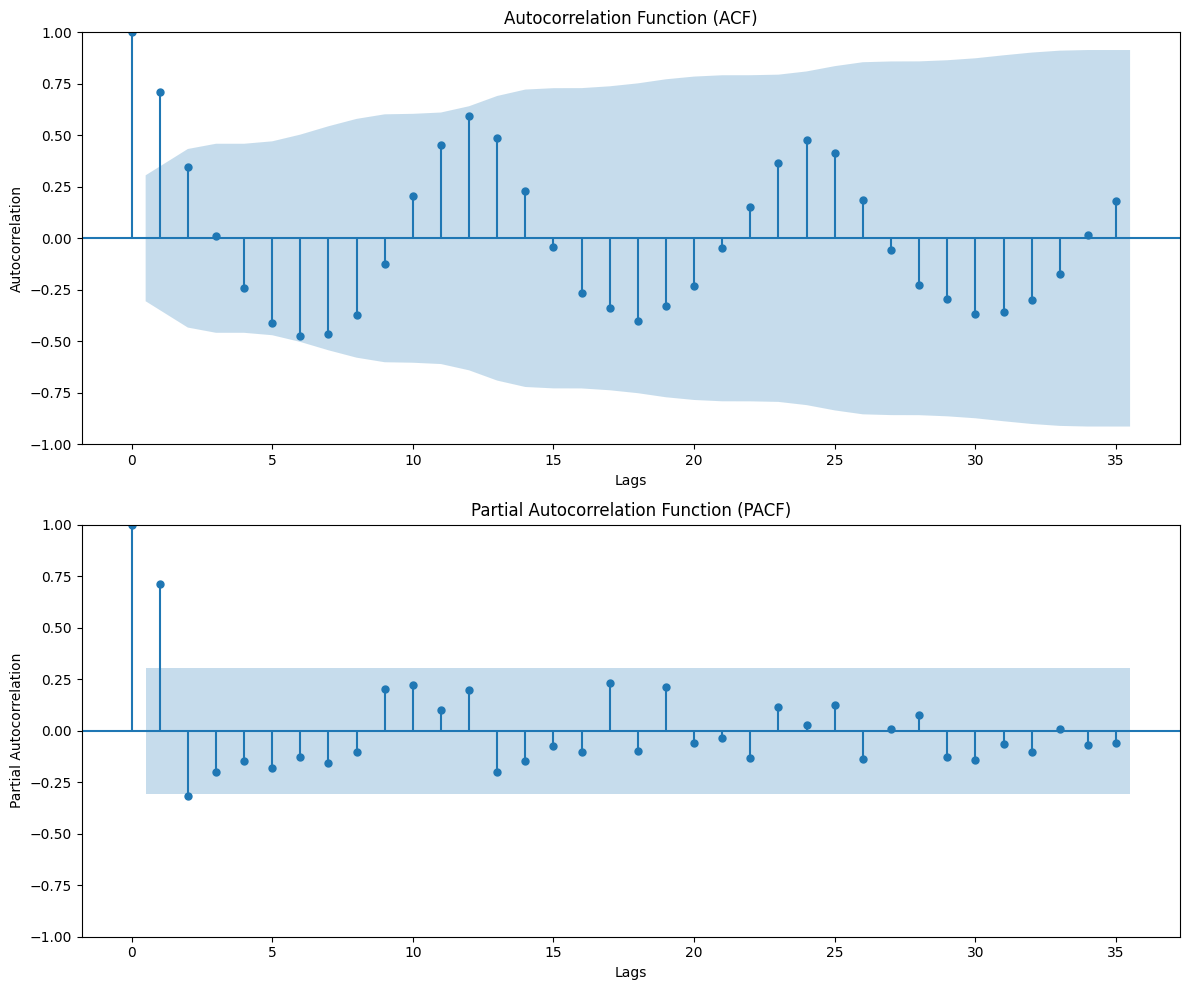

In [259]:


# Resample the data to monthly frequency and calculate the mean
monthly_data = weekly_data.resample('ME').mean()

# Determine the maximum allowable lags
max_lags = len(monthly_data) // 2

# Plot ACF and PACF with 1% insignificance region around zero
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Autocorrelation Function (ACF)
plot_acf(monthly_data.dropna(), lags=max_lags, alpha=0.01, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")
axes[0].set_xlabel("Lags")
axes[0].set_ylabel("Autocorrelation")

# Partial Autocorrelation Function (PACF)
plot_pacf(monthly_data.dropna(), lags=max_lags, alpha=0.01, ax=axes[1], method='ywm')
axes[1].set_title("Partial Autocorrelation Function (PACF)")
axes[1].set_xlabel("Lags")
axes[1].set_ylabel("Partial Autocorrelation")

plt.tight_layout()
plt.show()


Looking at the ACF and PACF plots, I can see that the data shows a strong autocorrelation at lag 1, as the first spike in both plots is significant. This tells me that each month's value is highly influenced by the previous month's value. The ACF plot gradually decays as the lags increase, which suggests there might be an autoregressive process driving the data.

In the PACF plot, there’s a clear spike at lag 1, followed by smaller, insignificant spikes for subsequent lags. This pattern reinforces the idea that the relationship is primarily explained by a first-order autoregressive process (AR(1)).

The presence of periodic spikes in the ACF at later lags also hints at potential seasonality in the data, though it's not overwhelmingly strong. This could mean that while there might be some repetitive patterns over time, the data is largely driven by short-term relationships.

Based on these observations, I’d consider fitting an ARIMA model, starting with an AR(1) structure, and possibly explore adding a seasonal component if further analysis confirms periodic patterns.

# **Step 6: Determine if data should be transformed.**

In [260]:
result = adfuller(monthly_data['incidents'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")


ADF Statistic: -1.5582907167205833
p-value: 0.5045043133925445
Critical Value (1%): -3.548493559596539
Critical Value (5%): -2.912836594776334
Critical Value (10%): -2.594129155766944


**Interpretation:**

ADF Statistic:

The ADF statistic is -1.558, which is greater than the critical values at all significance levels (1%, 5%, and 10%). This suggests that the null hypothesis of non-stationarity cannot be rejected.
p-value:

The p-value is 0.504, which is much higher than the typical threshold of 0.05. This further supports that the null hypothesis (the series is non-stationary) cannot be rejected.
Conclusion:

The data is non-stationary, meaning it likely has trends, seasonality, or other non-constant statistical properties over time. Transformations will be needed to make the series stationary before applying models like ARIMA.

# **Step 7: Decompose the data and determine the STL residuals.**

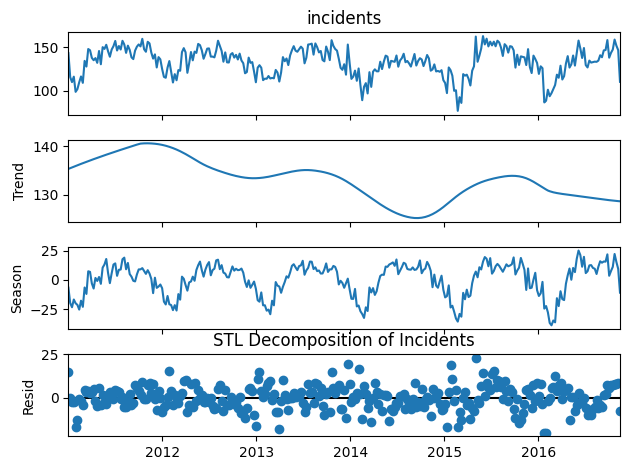

date
2011-01-02    14.698710
2011-01-09     0.121652
2011-01-16    -2.133107
2011-01-23    -2.650519
2011-01-30   -16.994361
Freq: W-SUN, Name: resid, dtype: float64


In [261]:

# Assuming your DataFrame is 'weekly_data' and 'incidents' is the column of interest.
# Adjust the seasonal parameter depending on your data's seasonality period.
stl = STL(weekly_data['incidents'], seasonal=53)  # For weekly data with a yearly pattern
stl_object = stl.fit()

# Plot the decomposition results
stl_object.plot()
plt.title("STL Decomposition of Incidents")
plt.show()

# Store the residuals
residuals = stl_object.resid
print(residuals.head())


# **Step 8: Apply Ljung-Box and ADF tests on the data.**


# **Step 9: Provide a clear and precise rationale for the  data analysis and interpretation.**

todo

# Reflect

Write a brief paragraph highlighting your process and the rationale to showcase critical thinking and problem-solving.

> Select the pen from the toolbar to add your entry.

### Reference
BPD, 2024. Baltimore Crime Data. [online]. Available at: <https://data.world/baltimore/baltimore-crime-data>. [Accessed 5 March 2024].  